<a href="https://colab.research.google.com/github/ManoloSampaio/QuarentenaDeDados/blob/master/QuarentenaDeDadosAula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Código para carregar o dataframe:

In [2]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb = imdb.drop_duplicates()
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


## Desafio 1

### Modificando de categórica para numérica:
1. Colorido = 1
2. Preto e branco = 0

In [3]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Plotando o boxplot

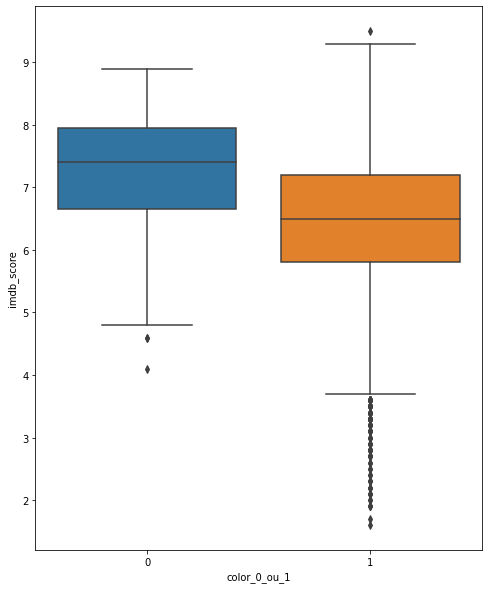

In [4]:
plt.figure(figsize=(8,10))
sns.boxplot(data = color_or_bw,x='color_0_ou_1',y='imdb_score')
plt.show()

### Desafio 2:
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


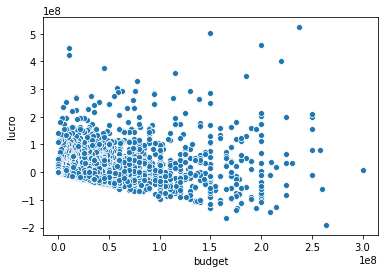

In [6]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
sns.scatterplot(x="budget", y="lucro", data = budget_gross)
plt.show()

In [7]:
entubada_hollywood = imdb_usa.loc[(imdb_usa['budget']>2.5*(10**8)) & (imdb_usa['lucro']<0)].min()
entubada_hollywood

color                                                                    Color
director_name                                                   Andrew Stanton
num_critic_for_reviews                                                     324
duration                                                                   100
director_facebook_likes                                                     15
actor_3_facebook_likes                                                     284
actor_2_name                                                      Donna Murphy
actor_1_facebook_likes                                                     640
gross                                                              7.30587e+07
genres                                                 Action|Adventure|Sci-Fi
actor_1_name                                                      Brad Garrett
movie_title                                                       John Carter 
num_voted_users                                     

A entubada monstra foi do filme John Carter.

# Desafio 3:
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

### Passo 1: selecionando os filmes mais recentes.

In [8]:
filmes_recentes = imdb_usa.loc[imdb['title_year']>=2016]
filmes_recentes

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,80249062.0
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Captain America: Civil War,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000,157197282.0
57,Color,Justin Lin,322.0,122.0,681.0,105.0,Melissa Roxburgh,998.0,130468626.0,Action|Adventure|Sci-Fi|Thriller,Sofia Boutella,Star Trek Beyond,53607,1327,Lydia Wilson,4.0,hatred|sequel|space opera|star trek|third part,http://www.imdb.com/title/tt2660888/?ref_=fn_t...,432.0,English,USA,PG-13,185000000.0,2016.0,119.0,7.5,2.35,30000,-54531374.0
63,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000,-55948241.0
65,Color,Bryan Singer,396.0,144.0,0.0,1000.0,Michael Fassbender,34000.0,154985087.0,Action|Adventure|Sci-Fi,Jennifer Lawrence,X-Men: Apocalypse,148379,49684,Tye Sheridan,6.0,mutant|superhero|superhero team|x men|year 1983,http://www.imdb.com/title/tt3385516/?ref_=fn_t...,622.0,English,USA,PG-13,178000000.0,2016.0,13000.0,7.3,2.35,54000,-23014913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,Color,Warren Sheppard,3.0,94.0,0.0,212.0,Randy Jay Burrell,918.0,NaN,Action|Romance|Sport,Jennifer Hale,Fight to the Finish,60,2091,Vincent De Paul,0.0,fighting|karate,http://www.imdb.com/title/tt3152288/?ref_=fn_t...,2.0,English,USA,PG-13,150000.0,2016.0,402.0,4.0,NaN,381,NaN
4773,Color,Darren Lynn Bousman,10.0,97.0,163.0,303.0,Barry Bostwick,636.0,NaN,Horror|Musical,Paul Sorvino,Alleluia! The Devil's Carnival,259,2438,Terrance Zdunich,5.0,carnival|devil|redemption|reference to god,http://www.imdb.com/title/tt3892618/?ref_=fn_t...,20.0,English,USA,NaN,500000.0,2016.0,456.0,7.4,1.78,707,NaN
4775,Color,Joel Paul Reisig,1.0,108.0,431.0,317.0,Joel Paul Reisig,466.0,NaN,Family,Carrie Bradstreet,Rodeo Girl,62,1628,Yassie Hawkes,2.0,NaN,http://www.imdb.com/title/tt4062896/?ref_=fn_t...,4.0,English,USA,PG,500000.0,2016.0,431.0,5.7,NaN,0,NaN
4777,Color,Luke Dye,1.0,84.0,0.0,53.0,Jeff Delaney,385.0,NaN,Family,Mike Stanley,The Little Ponderosa Zoo,15,683,Jamison Stalsworth,2.0,NaN,http://www.imdb.com/title/tt3846442/?ref_=fn_t...,1.0,English,USA,NaN,500000.0,2016.0,169.0,5.2,16.00,9,NaN


Existem filmes recentes que não tem informação de budget e gross(nesse dataset),então vou desconsidera-los

In [9]:
filmes_com_valores_cal = filmes_recentes.loc[filmes_recentes['lucro'].isnull()==False]
filmes_com_valores_cal

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,80249062.0
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Captain America: Civil War,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000,157197282.0
57,Color,Justin Lin,322.0,122.0,681.0,105.0,Melissa Roxburgh,998.0,130468626.0,Action|Adventure|Sci-Fi|Thriller,Sofia Boutella,Star Trek Beyond,53607,1327,Lydia Wilson,4.0,hatred|sequel|space opera|star trek|third part,http://www.imdb.com/title/tt2660888/?ref_=fn_t...,432.0,English,USA,PG-13,185000000.0,2016.0,119.0,7.5,2.35,30000,-54531374.0
63,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000,-55948241.0
65,Color,Bryan Singer,396.0,144.0,0.0,1000.0,Michael Fassbender,34000.0,154985087.0,Action|Adventure|Sci-Fi,Jennifer Lawrence,X-Men: Apocalypse,148379,49684,Tye Sheridan,6.0,mutant|superhero|superhero team|x men|year 1983,http://www.imdb.com/title/tt3385516/?ref_=fn_t...,622.0,English,USA,PG-13,178000000.0,2016.0,13000.0,7.3,2.35,54000,-23014913.0
73,Color,David Ayer,418.0,123.0,452.0,329.0,Robin Atkin Downes,10000.0,161087183.0,Action|Adventure|Comedy|Sci-Fi,Will Smith,Suicide Squad,118992,11287,Ike Barinholtz,8.0,based on comic book|critically bashed|father d...,http://www.imdb.com/title/tt1386697/?ref_=fn_t...,971.0,English,USA,PG-13,175000000.0,2016.0,336.0,6.9,2.35,80000,-13912817.0
92,Color,Roland Emmerich,286.0,120.0,776.0,535.0,Sela Ward,890.0,102315545.0,Action|Adventure|Sci-Fi,Vivica A. Fox,Independence Day: Resurgence,58137,3233,Judd Hirsch,0.0,alien|battle|defense|independence day|mothership,http://www.imdb.com/title/tt1628841/?ref_=fn_t...,520.0,English,USA,PG-13,165000000.0,2016.0,812.0,5.5,2.35,67000,-62684455.0
106,Color,James Bobin,218.0,113.0,33.0,11000.0,Alan Rickman,40000.0,76846624.0,Adventure|Family|Fantasy,Johnny Depp,Alice Through the Looking Glass,21352,80806,Anne Hathaway,1.0,clock|dark fantasy|mad hatter|queen|sequel,http://www.imdb.com/title/tt2567026/?ref_=fn_t...,131.0,English,USA,PG,170000000.0,2016.0,25000.0,6.4,1.85,30000,-93153376.0
108,Color,Duncan Jones,275.0,123.0,0.0,648.0,Callum Rennie,3000.0,46978995.0,Action|Adventure|Fantasy,Dominic Cooper,Warcraft,111609,5505,Ruth Negga,0.0,based on video game|fictional language|fiction...,http://www.imdb.com/title/tt0803096/?ref_=fn_t...,781.0,English,USA,PG-13,160000000.0,2016.0,716.0,7.3,2.35,89000,-113021005.0
150,Color,Paul Feig,464.0,116.0,176.0,322.0,Kate McKinnon,783.0,118099659.0,Action|Comedy|Fantasy|Sci-Fi,Ed Begley Jr.,Ghostbusters,69757,2097,Zach Woods,4.0,ghost|ghostbuster|ghostbusters|male objectific...,http://www.imdb.com/title/tt1289401/?ref_=fn_t...,1211.0,English,USA,PG-13,144000000.0,2016.0,370.0,5.5,2.35,62000,-25900341.0


## Passo 3: Separando os filmes.
Separando quais deram lucro e quais não.

Número de filmes que deram lucro: 27
Número de filmes que não deram lucro: 22


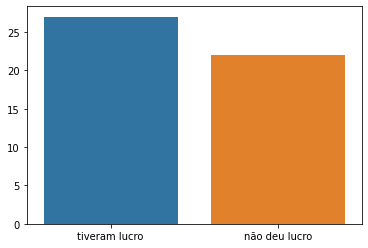

In [10]:
filmes_com_lucro = filmes_com_valores_cal.loc[filmes_com_valores_cal['lucro']>0]
filmes_com_entubada = filmes_com_valores_cal.loc[filmes_com_valores_cal['lucro']<0]
num_filmes_lucro = (len(filmes_com_lucro))
num_filmes_entubada = (len(filmes_com_entubada))
sns.barplot(x=['tiveram lucro','não deu lucro'],y =[num_filmes_lucro,num_filmes_entubada])
print("Número de filmes que deram lucro:",num_filmes_lucro)
print("Número de filmes que não deram lucro:",num_filmes_entubada)

Mais filme com lucro que filmes que não deram lucro. Vamos verificar como ficou destribuido os lucros e perdas. Vamos verificar os boxplots.

### Boxplot dos lucros:

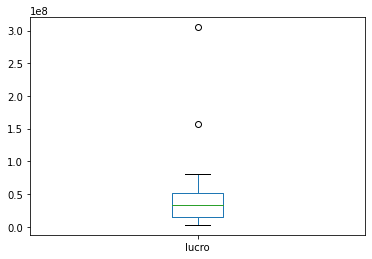

In [11]:
filmes_com_lucro['lucro'].plot.box()

### Boxplot da perda de dinheiro:
Vou multiplicar por -1 para facilitar a compreensão.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


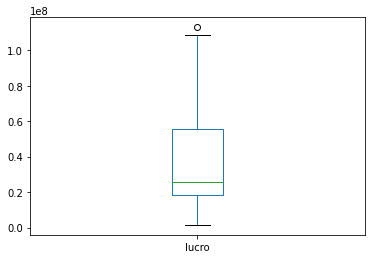

In [12]:
filmes_com_entubada['lucro']=-1*filmes_com_entubada['lucro']
filmes_com_entubada['lucro'].plot.box()
plt.show()

A maioria dos filmes que perdeu dinhero, perdeu menos de 60 milhões, que é um dinheiro considerável. A maioria que ganhou dinheiro, ganhou um pouco abaixo de 70 milhões, sendo que alguns outliers ganharam muito mais que isso(Blockbusters). Então é complicado colocar que existe uma relação entre o fato de um filme ser rescente ele estar com pouco lucro, acho que é preciso de outras *features* para determinar se um filme não vai ter lucro positivo. 

## Desafio 4

### Parte 1: Verificando o plot

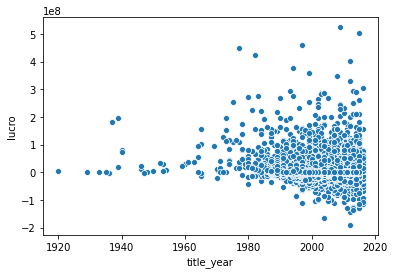

In [13]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

### Parte 2: Pegando o intervalo de tempo (1920 a 1941)

In [14]:
preguerra = imdb_usa.loc[imdb_usa['title_year'].between(1930,1940)]
preguerra.sort_values('lucro',ascending=False)[['movie_title','lucro','title_year']].dropna().head(5)

,movie_title,lucro,title_year
3970,Gone with the Wind,194678278.0,1939.0
4449,Snow White and the Seven Dwarfs,182925485.0,1937.0
1143,Pinocchio,81700000.0,1940.0
4225,Fantasia,74120000.0,1940.0
4157,The Wizard of Oz,19402612.0,1939.0


A Disney já esta entre os maiores lucros desde essa época.

## Desafio 5:
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

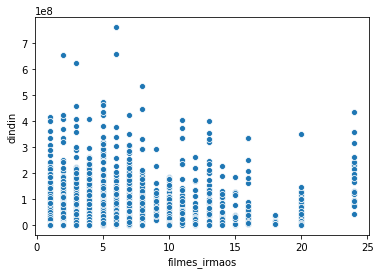

In [15]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [16]:
woody = gross_director.loc[gross_director['filmes_irmaos'].between(17,19) ]
woody

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


era o Woody Allen mesmo.

## Desafio 6:
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

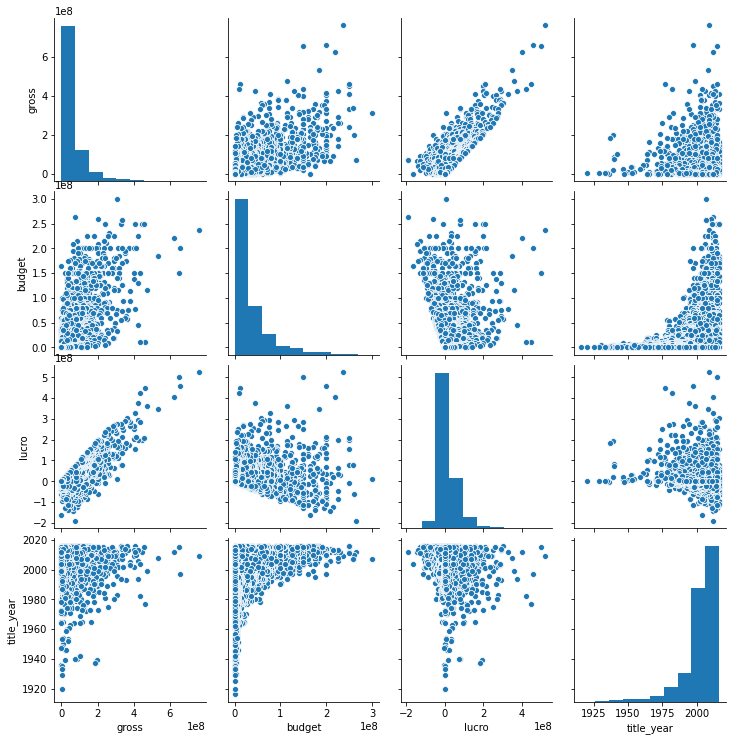

In [17]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O gráfico de lucro x gross, mostra uma relação aproximadament linear entre esses valores, o que faz sentido, pois se entra mais temos maior lucro. Para pequenos valores de budgets, temos aproximademente um comportamento linear, o que faz certo sentido, pois, filmes com baixo orçamento recebem pouco, as vezes vem muito mais de leis de financiamento, então existe um intervalo de valores para que o comportamento é válido. Ainda sobre relações aproximadamente lineares, para lucros pequenos, temos temos também a relação inversa com o budget, lembrando que 
$$Lucro = gross-budget$$
Quando gross muito maior que budget, Lucro é aproximdamento o gross, quando o budget muito maior que o gross, Lucro é o inverso do  budget.<br>
O ano é uma grandeza que por si só não reflete as grandezas lucro, budget e gross. Apesar de que é possível ver uma relação, para alguns valores, exponencial.


## Desafio 7:
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

## Correlação para filmes antigos.

In [18]:
old_movies = imdb_usa.query("budget >0 | gross > 0|title_year<2000")[["gross","lucro","budget","num_voted_users"]].dropna()
old_movies[["gross", "budget", "lucro"]].corr()

,gross,budget,lucro
gross,1.000000,0.645673,0.797037
budget,0.645673,1.000000,0.053455
lucro,0.797037,0.053455,1.000000


## Correlação para filmes depois de 2000

In [0]:
milenium_movies = imdb_usa.query("budget >0 | gross > 0|title_year>=2000")[["gross","lucro","budget","num_voted_users"]].dropna()

In [20]:
milenium_movies[["gross", "budget", "lucro"]].corr()

,gross,budget,lucro
gross,1.000000,0.645673,0.797037
budget,0.645673,1.000000,0.053455
lucro,0.797037,0.053455,1.000000


A correlação entre gross e budget se mantem, com 0.7 e gross e budget com 0.79. Essa correlação se manter com o tempo é um reflexo de ganhar mais faz o lucro ser maior sempre, logo para prever o lucro, uma boa medida seria prever qual sera o ganho.

## Desafio 8:
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

In [0]:
## Modulos da regressão linear.
import numpy as np
from sklearn.linear_model import LinearRegression

In [22]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["gross", "lucro","budget"]].dropna()
budget_gross[["gross", "lucro","budget"]].corr()

,gross,lucro,budget
gross,1.000000,0.797037,0.645673
lucro,0.797037,1.000000,0.053455
budget,0.645673,0.053455,1.000000


### Vamos verificar a correlação realizando uma regressão linear:

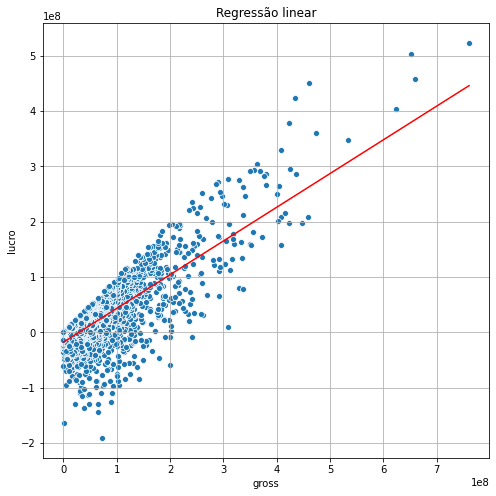

In [23]:
feature = budget_gross['gross'].values
output = budget_gross['lucro'].values
reg = LinearRegression()
reg.fit(feature.reshape(-1,1),output)
ypred = np.dot(feature.reshape(-1,1), reg.coef_) + reg.intercept_
sns.color_palette("GnBu_d")
plt.figure(figsize=(8,8))
sns.scatterplot(x="gross", y="lucro", data = budget_gross)
plt.plot(feature.reshape(-1,1),ypred,'r')
plt.title("Regressão linear")
plt.grid()
plt.show()

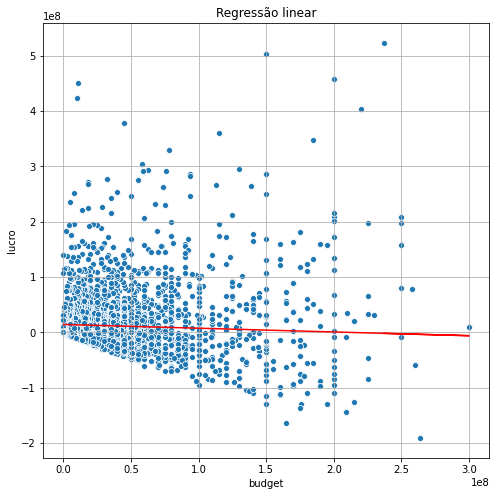

In [24]:
feature = budget_gross['budget'].values
output = budget_gross['lucro'].values
reg = LinearRegression()
reg.fit(-feature.reshape(-1,1),output)
ypred = np.dot(feature.reshape(-1,1), reg.coef_) + reg.intercept_
plt.figure(figsize=(8,8))
plt.plot(feature.reshape(-1,1),ypred,'r')
sns.scatterplot(x="budget", y="lucro", data = budget_gross)
plt.title("Regressão linear")
plt.grid()
plt.show()

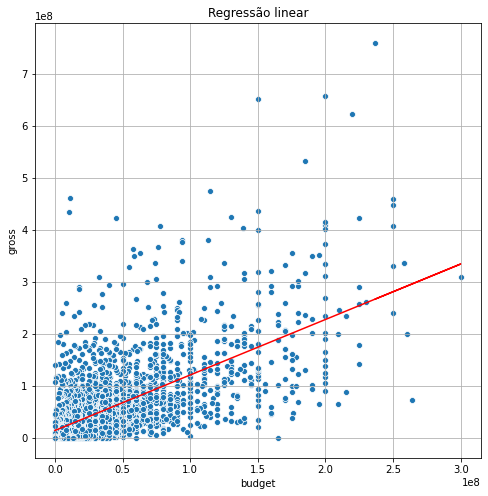

In [25]:
feature = budget_gross['budget'].values
output = budget_gross['gross'].values
reg = LinearRegression()
reg.fit(feature.reshape(-1,1),output)
ypred = np.dot(feature.reshape(-1,1), reg.coef_) + reg.intercept_
plt.figure(figsize=(8,8))
plt.plot(feature.reshape(-1,1),ypred,'r')
sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.title("Regressão linear")
plt.grid()
plt.show()

Os plots acima reforçam os pontos abordados no item 6, observe por exemplo a correlação entre lucro e budget em pequenos valores e o aumento do desvio dos valores do lucro (distância do ponto a reta) de regressão, conforme o budget aumenta. Além disso a relação natural entre ganho e lucro é bem observada.

## Desafio 9:
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [0]:
new_correlations = imdb_usa.query("budget >0 | gross > 0")[["gross", "lucro","budget","num_voted_users","imdb_score"]].dropna()
modern_corelations = imdb_usa.query("budget >0 | gross > 0|title_year>=2014")[["cast_total_facebook_likes","gross","lucro","budget","imdb_score","num_voted_users","movie_facebook_likes"]].dropna()

In [27]:
new_correlations[["gross", "budget", "lucro", "num_voted_users","imdb_score"]].corr()

,gross,budget,lucro,num_voted_users,imdb_score
gross,1.000000,0.645673,0.797037,0.635700,0.268060
budget,0.645673,1.000000,0.053455,0.407874,0.070404
lucro,0.797037,0.053455,1.000000,0.508717,0.294858
num_voted_users,0.635700,0.407874,0.508717,1.000000,0.507043
imdb_score,0.268060,0.070404,0.294858,0.507043,1.000000


Existe uma relação do número de votos e o ganho, o que é esperado, já que quem vota  gastou para ter acesso ao filme(considerando que niguém utilizou de mescanimos P2P para compartilhamento de conteúdo digital). A relação entre lucro e score é muita fraca, apenas 0.29, o que reflete, por exemplo, muitos bons filmes não serem muito conhecidos e também os blockbusters, que as vezes não são bem avaliados.

### Verificar o impacto das redes sociais





In [28]:
modern_corelations.corr()

,cast_total_facebook_likes,gross,lucro,budget,imdb_score,num_voted_users,movie_facebook_likes
cast_total_facebook_likes,1.000000,0.215762,0.097707,0.233211,0.134710,0.244311,0.202610
gross,0.215762,1.000000,0.797037,0.645673,0.268060,0.635700,0.376575
lucro,0.097707,0.797037,1.000000,0.053455,0.294858,0.508717,0.228476
budget,0.233211,0.645673,0.053455,1.000000,0.070404,0.407874,0.333761
imdb_score,0.134710,0.268060,0.294858,0.070404,1.000000,0.507043,0.291996
num_voted_users,0.244311,0.635700,0.508717,0.407874,0.507043,1.000000,0.523383
movie_facebook_likes,0.202610,0.376575,0.228476,0.333761,0.291996,0.523383,1.000000


Nesse dataset, as redes sociais ainda não representam, diretamente, um impacto significativo no lucro, a maior correlação é com o engajamento de votos.